## Test a simple  regression model

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [2]:
dbname = 'traffic_police_combined'
username = 'along528'
pswd = 'password'
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [3]:
sql_query = """
SELECT  * FROM combined_rpsi_searches_over_stops_black_over_white;
"""
data = pd.read_sql_query(sql_query,con)
#just look at one year for now
data = data.convert_objects(convert_numeric=True)
#normalize by number of officers in department
for column in ['ftgangoff','ftdrugoff','ftterroff','numcpo',
               'white','black','hispanic','asian','nathaw',
               'amerind','multrace','unkrace','male','female']:
    data[column] = data[column].div(data['swnftemp'],axis='index')
data = data.reset_index().drop('level_0',1)
data = data[data['zipcode']!=27611] #remove nc state highway patrol

data['black_over_white'] = data['black'].div(data['white'],axis='index')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data
#with pd.option_context("display.max_rows",100,"display.max_columns", 100):
#    print data[['agency','population']]

/Users/along528/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,index,city,state,zipcode,population,agency,swnftemp,ftgangoff,ftdrugoff,ftterroff,numcpo,drivhis,cultdiv,white,black,hispanic,asian,nathaw,amerind,multrace,unkrace,male,female,carpat,footpat,cptrnnew,cptrninserv,cpmission,cpplan,cpnone,lessthanplcy,racialprplcy,year,rpsi,black_over_white
0,0,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2002,0.894228,0.053097
1,1,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2003,0.721468,0.053097
2,2,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2004,0.996812,0.053097
3,3,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2005,1.139060,0.053097
4,4,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2006,0.934545,0.053097
5,5,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2007,1.173731,0.053097
6,6,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2008,0.734066,0.053097
7,7,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2009,1.006310,0.053097
8,8,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2010,1.196854,0.053097
9,9,Graham,NC,27253,144790,ALAMANCE COUNTY SHERIFF'S OFFICE,120,0,0.008333,0.000,0.025,1,0,0.941667,0.05,0.008333,0.000,0,0.000,0,0,0.866667,0.133333,1,1,0,0,1,0,0,1,1,2011,1.269631,0.053097


# Explore features

plot histogram of rpsi

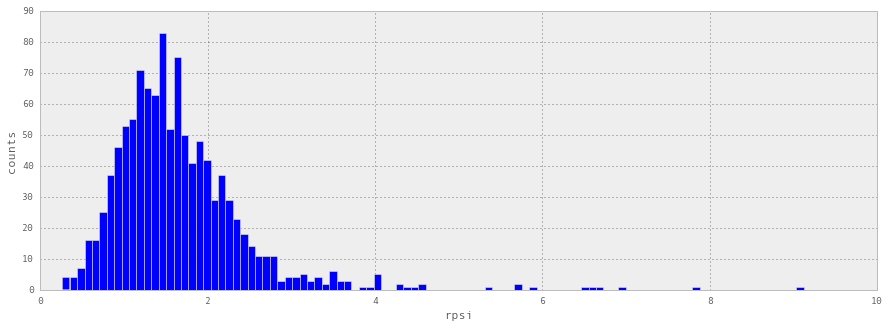

mean = 1.65701917758 stdev = 0.82485022527
median = 1.50647569005


In [5]:
tmpdata = data[data['rpsi']<10]
tmpdata = tmpdata[tmpdata['rpsi']>0]

plt.hist(tmpdata['rpsi'].values,color='b',bins=100)
#plt.ylim([0,15])
plt.xlabel('rpsi')
plt.ylabel('counts')
plt.show()
plt.clf()
print "mean =",tmpdata['rpsi'].values.mean(),"stdev =",tmpdata['rpsi'].values.std()
print "median =",np.median(tmpdata['rpsi'].values)

CHARLOTTE-MECKLENBURG POLICE DEPT
GUILFORD COUNTY SHERIFFS OFFICE
WAKE COUNTY SHERIFF'S OFFICE


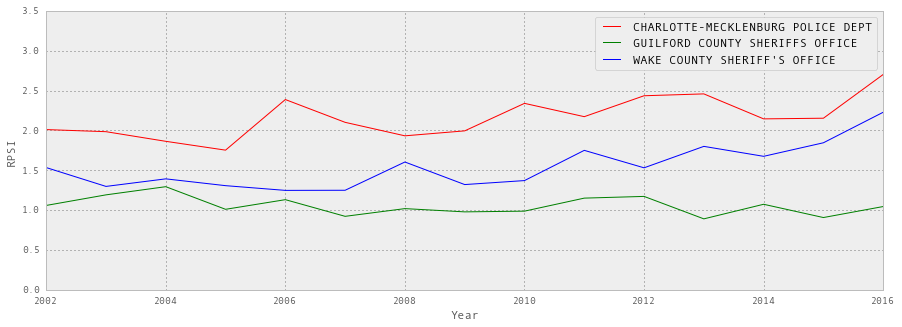

In [11]:
tmpdata = data[data['rpsi']<4.]
tmpdata = tmpdata[tmpdata['rpsi']>=0.]
tmpdata = tmpdata[tmpdata['population']>400000.]
#tmpdata = tmpdata[tmpdata['population']<30000.]


handles = []

for agency in tmpdata['agency'].unique():
    print agency
    agency_df = tmpdata[tmpdata['agency']==agency].sort_values('year')
    handle = plt.plot(agency_df['year'].values,agency_df['rpsi'].values,label=agency)
    handles.append(agency) 
plt.ylabel('RPSI')
plt.xlabel('Year')
plt.ylim([0,3.5])
plt.legend(handles)
plt.savefig('images/rpsi_vs_time.png',facecolor='white',transparent=True)
plt.show()

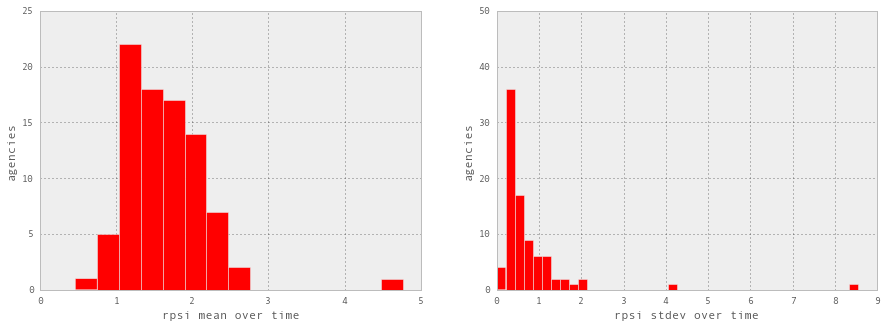

1.62475466466
0.745055854604


In [7]:
#tmpdata = data[data['rpsi']<4.]
tmpdata = data[data['rpsi']>=0.]
#tmpdata = tmpdata[tmpdata['population']>400000.]
#tmpdata = tmpdata[tmpdata['population']<30000.]

means = []
stds = []
for agency in tmpdata['agency'].unique():
    agency_df = tmpdata[tmpdata['agency']==agency].sort_values('year')
    means.append(agency_df['rpsi'].values.mean())
    stds.append(agency_df['rpsi'].values.std())
plt.subplot(1,2,1)
plt.hist(means,bins=15)
plt.xlabel('rpsi mean over time')
plt.ylabel('agencies')
plt.subplot(1,2,2)
plt.xlabel('rpsi stdev over time')
plt.ylabel('agencies')
plt.ylim([0,50])
plt.hist(stds,bins=40)
plt.show()
print np.array(means).mean()

print np.array(stds).mean()


Plot rpsi vs feature

# Clean data

In [8]:
data = data[data['year']==2006]
data = data[data['population']>=10000.]

data = data.drop(['city','index','state','zipcode','agency','year','hispanic',
                 'asian','nathaw','amerind','multrace','unkrace',
                 'male','female','lessthanplcy','drivhis'],1)
numeric_categories = ['rpsi','black_over_white','swnftemp','ftdrugoff','ftterroff',
                      'numcpo','white','black','population'] #,
                      #'population']
data

,population,swnftemp,ftgangoff,ftdrugoff,ftterroff,numcpo,cultdiv,white,black,carpat,footpat,cptrnnew,cptrninserv,cpmission,cpplan,cpnone,racialprplcy,rpsi,black_over_white
4,144790,120,0.000000,0.008333,0.000,0.025000,0,0.941667,0.050000,1,1,0,0,1,0,0,1,0.934545,0.053097
19,24399,74,0.000000,0.081081,0.000,0.000000,1,0.972973,0.027027,1,1,0,0,0,0,0,1,1.981602,0.027778
34,72907,193,0.010363,0.077720,0.000,0.036269,1,0.891192,0.082902,1,1,1,3,1,0,0,1,1.527546,0.093023
49,45636,44,0.000000,0.136364,0.000,0.000000,1,0.840909,0.136364,1,0,0,0,0,0,0,1,0.812290,0.162162
72,98966,110,0.000000,0.072727,0.000,0.481818,0,0.954545,0.045455,1,0,2,1,1,1,0,1,1.477273,0.047619
87,48689,105,0.000000,0.009524,0.000,0.019048,0,0.866667,0.104762,1,1,0,0,1,0,0,1,1.006414,0.120879
102,162798,197,0.000000,0.000000,0.000,0.076142,0,0.903553,0.096447,1,0,0,3,1,0,0,1,1.212389,0.106742
136,114221,156,0.000000,0.006410,0.000,0.076923,0,0.916667,0.076923,1,1,1,3,1,0,0,1,0.845074,0.083916
151,155123,119,0.042017,0.042017,0.000,0.050420,0,0.957983,0.033613,1,0,8,0,0,0,0,0,0.608796,0.035088
166,50198,115,0.000000,0.000000,0.000,0.052174,0,0.817391,0.173913,1,1,3,3,1,0,0,0,2.076480,0.212766


In [9]:
tmpdata = data[data['rpsi']<4.]
tmpdata = tmpdata[tmpdata['rpsi']>=0.]
ncolumns = tmpdata.drop('rpsi',1).columns.shape[0]
for i,column in enumerate(tmpdata.drop('rpsi',1).columns):
    plt.scatter(tmpdata[column].values,tmpdata['rpsi'].values)
    plt.xlabel(column)
    plt.ylabel('rpsi')
    plt.savefig('images/%s.png' % (column))
    plt.clf()


# Build Model

In [10]:
from sklearn.preprocessing import OneHotEncoder

X_int = np.array(data.drop(numeric_categories,1))
enc = OneHotEncoder(sparse=False) #otherwise hard to combined
X_int = enc.fit_transform(X_int)
#X_num = np.array(data[numeric_categories].drop('rpsi',1))

X_num = np.array(data[numeric_categories].drop('rpsi',1))
X_num_scaled = (X_num-np.mean(X_num, axis=0))/np.std(X_num, axis=0)
X = np.concatenate([X_num_scaled,X_int],axis=1)
y = np.array(data['rpsi'])

Do plots of rpsi vs time for each agency.

In [11]:
for i,name in enumerate(data[numeric_categories].drop('rpsi',1).columns):
    print i,name

0 black_over_white
1 swnftemp
2 ftdrugoff
3 ftterroff
4 numcpo
5 white
6 black
7 population


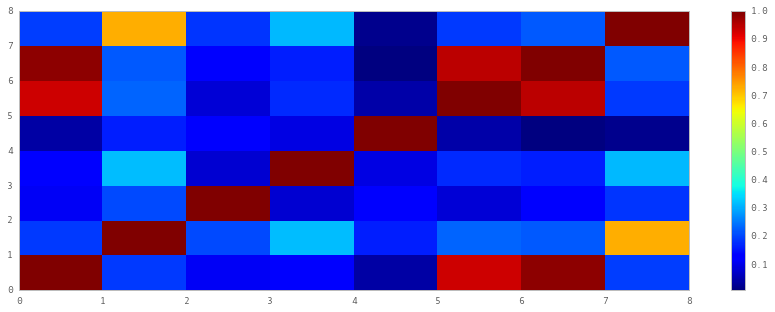

In [12]:
plt.pcolor(np.abs(np.corrcoef(X_num_scaled.T))) #also look at categories?
plt.colorbar()

In [89]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [90]:
from sklearn import linear_model
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha=.5)

# Train the model using the training sets
regr.fit(X_train, y_train)



Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [179]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


('Coefficients: \n', array([ -7.42444132e-01,  -7.13836977e-01,   1.27170759e+00,
         5.77565763e+00,  -9.12261019e-01,  -2.11332952e-01,
        -1.84200749e-01,   1.05133607e+00,   6.90894972e-01,
        -5.81660066e-01,  -1.00240975e-01,  -6.83355347e-01,
        -9.84937501e-01,   6.15331853e-01,   2.04181972e-01,
         7.07387195e+00,   5.32966298e+00,   9.11276262e+00,
         5.20069362e+00,   4.42234400e+00,  -3.85952323e+01,
         7.45589711e+00,  -1.32291358e-14,  -2.97307458e-01,
         2.97307458e-01,  -1.94945601e-14,  -9.51689951e-02,
         9.51689951e-02,   1.22060689e+00,  -4.08747343e-01,
        -1.59710330e+00,  -3.22127099e-01,   1.10737086e+00,
         8.65772728e-01,   1.72361437e+00,  -1.60549732e+00,
        -9.83889780e-01,  -4.89269795e-01,   4.89269795e-01,
         4.89661702e-01,  -4.89661702e-01,   3.12582852e-01,
        -3.12582852e-01,   0.00000000e+00,  -6.88025297e-01,
         6.88025297e-01]))
Residual sum of squares: 20.37
Varian